In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import scipy
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #remove warning

In [5]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [6]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return(XTrain,XTest,yTrain,yTest)

In [7]:
def percentage_accuracy(yPred,yTest):
    return(accuracy_score(yTest, yPred))

In [8]:
def confusion_matrixp(yPred,yTest):
    return(confusion_matrix(yTest,yPred))

In [9]:
def saveAs(fileName, df):
    np.savetxt(fileName, df, delimiter=',')

In [7]:
#part1

path = "./winequality-red.csv"
df = load_dataset(path)
Class = df.columns[-1]

XTrain,XTest,yTrain,yTest = train_test(df)

train = pd.concat([XTrain,yTrain], axis=1)
test = pd.concat([XTrain,yTrain], axis=1)

saveAs('./winequality-train.csv', train)
saveAs('./winequality-test.csv', train)

In [8]:
#part2

X = df['pH'].values.reshape(-1,1)
y = df[Class].values.reshape(-1,1)

XTrain,XTest,yTrain,yTest = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()  
regressor.fit(XTrain, yTrain)

#print(regressor.intercept_)
#print(regressor.coef_)  #For retrieving the slope:

yPred = regressor.predict(XTest)
yTrainPred = regressor.predict(XTrain)

data = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPred.flatten()})

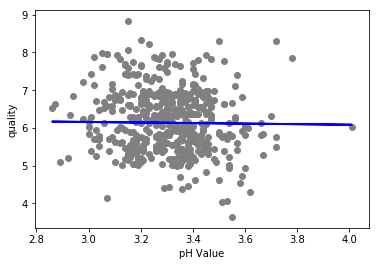

Root Mean Squared Error on Test Data: 0.8434022740015744
Root Mean Squared Error on Train Data: 0.8624300774972703


In [9]:
plt.scatter(XTest, yTest,  color='gray')
plt.xlabel("pH Value")
plt.ylabel("quality")
plt.plot(XTest, yPred, color='blue', linewidth=2)
plt.show()

print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(yTest, yPred)))
print('Root Mean Squared Error on Train Data:', np.sqrt(metrics.mean_squared_error(yTrain, yTrainPred)))

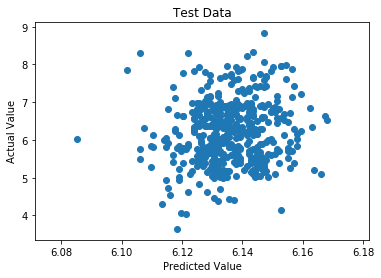

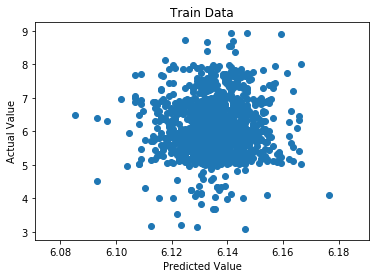

In [10]:
plt.scatter(yPred, yTest)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Test Data")
#plt.ylim([5.5,6.5])
plt.show()
plt.scatter(yTrainPred, yTrain)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Train Data")
plt.show()

Degree =  2


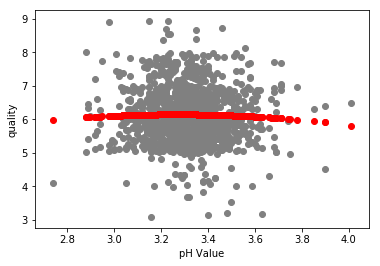

Degree =  3


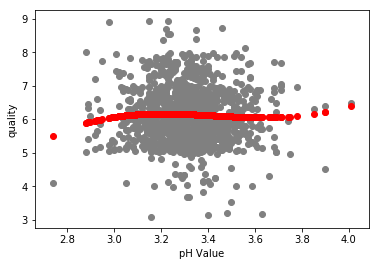

Degree =  4


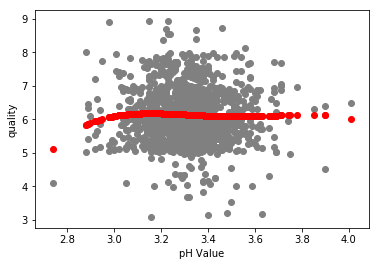

Degree =  5


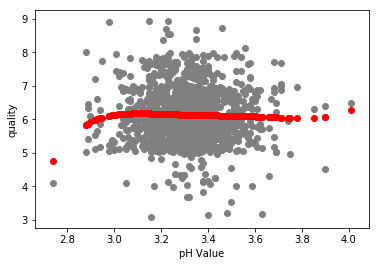

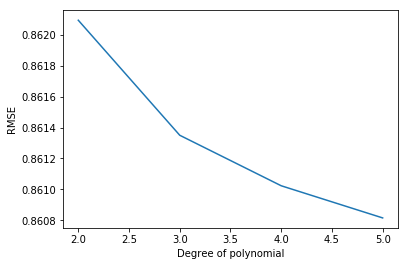

In [11]:
#part3
RMSEs = []
degrees = [2,3,4,5]
for d in degrees:
    poly = PolynomialFeatures(degree = d) 
    X_poly_train = poly.fit_transform(XTrain)
    poly.fit(X_poly_train, yTrain)

    model = LinearRegression()
    model.fit(X_poly_train, yTrain)
    y_poly_pred = model.predict(X_poly_train)

    rmse = np.sqrt(metrics.mean_squared_error(yTrain,y_poly_pred))
    RMSEs.append(rmse)
    
    print("Degree = ", d)
    plt.scatter(XTrain, yTrain,  color='gray')
    #plt.title(d)
    plt.xlabel("pH Value")
    plt.ylabel("quality")
    plt.scatter(XTrain, y_poly_pred, color='red')
    plt.show()
    
plt.plot(degrees, RMSEs)
plt.xlabel("Degree of polynomial")
plt.ylabel("RMSE")
plt.show()

Degrees =  2


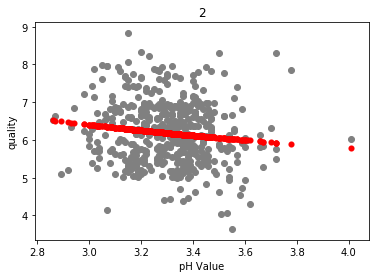

Degrees =  3


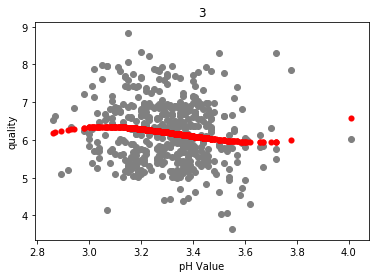

Degrees =  4


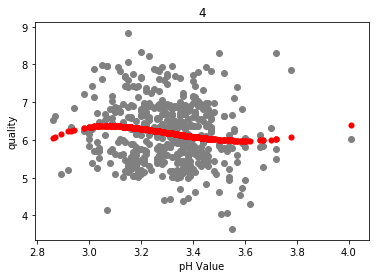

Degrees =  5


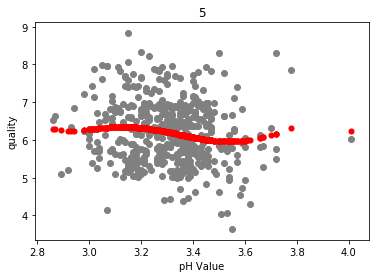

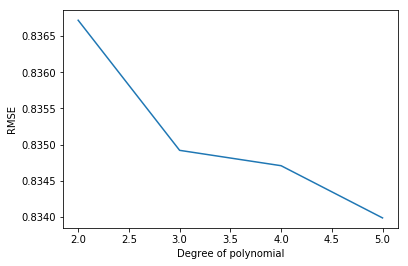

In [12]:
#part3
RMSEs = []
degrees = [2,3,4,5]
for d in degrees:
    poly = PolynomialFeatures(degree = d) 
    X_poly_test = poly.fit_transform(XTest)
    poly.fit(X_poly_test, yTest)

    model = LinearRegression()
    model.fit(X_poly_test, yTest)
    y_poly_pred = model.predict(X_poly_test)

    rmse = np.sqrt(metrics.mean_squared_error(yTest,y_poly_pred))
    RMSEs.append(rmse)
    
    print("Degrees = ", d)
    plt.scatter(XTest, yTest,  color='gray')
    plt.title(d)
    plt.xlabel("pH Value")
    plt.ylabel("quality")
    plt.scatter(XTest, y_poly_pred, color='red', linewidth=0.1)
    plt.show()
    
plt.plot(degrees, RMSEs)
plt.xlabel("Degree of polynomial")
plt.ylabel("RMSE")
plt.show()

In [13]:
#part4

path = "./winequality-red.csv"
df = load_dataset(path)
Class = df.columns[-1]

XTrain,XTest,yTrain,yTest = train_test(df)

regressor = LinearRegression()  
regressor.fit(XTrain, yTrain)

#print(regressor.intercept_)
#print(regressor.coef_)  #For retrieving the slope:

yPred = regressor.predict(XTest)
yTrainPred = regressor.predict(XTrain)

#data = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPred.flatten()})

In [14]:
print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(yTest, yPred)))
print('Root Mean Squared Error on Train Data:', np.sqrt(metrics.mean_squared_error(yTrain, yTrainPred)))

Root Mean Squared Error on Test Data: 0.7033967804062128
Root Mean Squared Error on Train Data: 0.7193299234565682


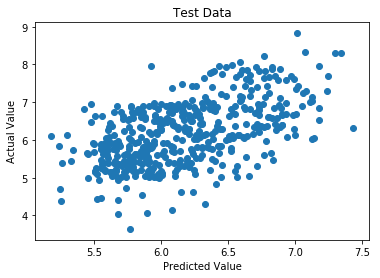

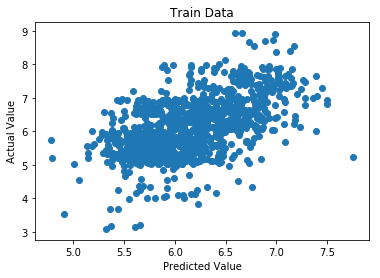

In [15]:
plt.scatter(yPred, yTest)

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Test Data")
#plt.ylim([5.5,6.5])
plt.show()
plt.scatter(yTrainPred, yTrain)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Train Data")
plt.show()

In [8]:
path = "./winequality-red.csv"
df = load_dataset(path)
Class = df.columns[-1]

XTrain,XTest,yTrain,yTest = train_test(df)

In [9]:
poly = PolynomialFeatures(degree = 2) 
X_poly_test = poly.fit_transform(XTest)
poly.fit(X_poly_test, yTest)

model = LinearRegression()
model.fit(X_poly_test, yTest)
y_poly_pred = model.predict(X_poly_test)

In [10]:
rmse = np.sqrt(metrics.mean_squared_error(yTest,y_poly_pred))
print(rmse)

0.6083806071529789


In [27]:
CORRs=[]
for i in range(len(df.columns)-1):
    corr = np.corrcoef(df[df.columns[i]], df[Class])[0,1]
    CORRs.append(corr)
    print(df.columns[i], " vs. ", Class, ": ", corr)

fixed acidity  vs.  quality :  0.10485591837083566
volatile acidity  vs.  quality :  -0.3699960846637292
citric acid  vs.  quality :  0.20858611118689965
residual sugar  vs.  quality :  0.0056070373222162325
chlorides  vs.  quality :  -0.12326479526612574
free sulfur dioxide  vs.  quality :  -0.04459520747497196
total sulfur dioxide  vs.  quality :  -0.17587560515178424
density  vs.  quality :  -0.16815425987822571
pH  vs.  quality :  -0.0465724615590019
sulphates  vs.  quality :  0.22702257664841538
alcohol  vs.  quality :  0.4346884851091924


In [ ]:
#part4

path = "./winequality-red.csv"
df = load_dataset(path)
Class = df.columns[-1]

XTrain,XTest,yTrain,yTest = train_test(df)

regressor = LinearRegression()  
regressor.fit(XTrain, yTrain)

#print(regressor.intercept_)
#print(regressor.coef_)  #For retrieving the slope:

yPred = regressor.predict(XTest)
yTrainPred = regressor.predict(XTrain)

#data = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPred.flatten()})

In [48]:
path = "./winequality-red.csv"
df = load_dataset(path)
df1= df[['volatile acidity', 'alcohol', 'quality']]
Class = df.columns[-1]

In [49]:
from sklearn.preprocessing import StandardScaler
def standardize(df):
    scaler=StandardScaler()
    df_std=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    df_std[df.columns[-1]]=df[df.columns[-1]]
    return df_std

In [50]:
XTrain,XTest,yTrain,yTest = train_test(df1)

regressor = LinearRegression()  
regressor.fit(XTrain, yTrain)

#print(regressor.intercept_)
#print(regressor.coef_)  #For retrieving the slope:

yPred = regressor.predict(XTest)
yTrainPred = regressor.predict(XTrain)

#data = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yP

In [51]:
print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(yTest, yPred)))
print('Root Mean Squared Error on Train Data:', np.sqrt(metrics.mean_squared_error(yTrain, yTrainPred)))

Root Mean Squared Error on Test Data: 0.7269412023997612
Root Mean Squared Error on Train Data: 0.7336200148391651


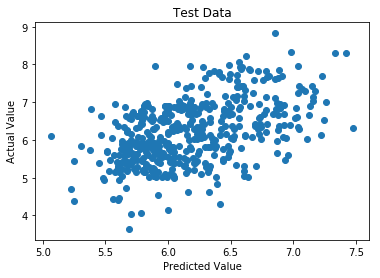

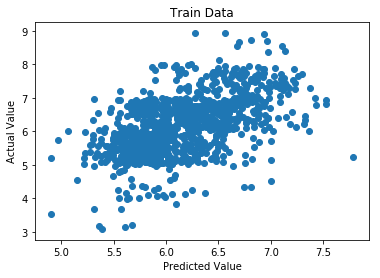

In [52]:
plt.scatter(yPred, yTest)

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Test Data")
#plt.ylim([5.5,6.5])
plt.show()
plt.scatter(yTrainPred, yTrain)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Train Data")
plt.show()

In [10]:
path = "./winequality-red.csv"
df = load_dataset(path)
df1= df[['volatile acidity', 'alcohol', 'quality']]
Class = df.columns[-1]

In [14]:
XTrain,XTest,yTrain,yTest = train_test(df1)

regressor = LinearRegression()  
regressor.fit(XTrain, yTrain)

#print(regressor.intercept_)
#print(regressor.coef_)  #For retrieving the slope:

yPred = regressor.predict(XTest)
yTrainPred = regressor.predict(XTrain)

#data = pd.DataFrame({'Actual': yTest.flatten(), 'Predicted': yPred.flatten()})